# [LEGALST-123] Lab 04: Summary Statistics & Aggregating Data & Visualizations

In [255]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

COMMENTED OUT PAST INTRODUCTION IN THIS CELL [click the Markdown cell to see]

<!-- # Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

**Summary Statistics**:
We will compute and display summary statistics for relevant columns, particularly 'age' and 'year.' This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset. Visualizations: We will create visualizations, including histograms for 'column1' and 'column2' columns, scatter plots to visualize relationships between specific variables, and box plots to display data distributions. Interpretations of these visualizations will be provided.

**Aggregating Data**:
We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, along with examples of aggregating data to gain insights. We will also explain the use of pivot tables in pandas for data aggregation.

**Time Series Analysis**:
Introduce time series data analysis using a specific example from the dataset. We will analyze and visualize police stop trends over time, such as monthly or yearly trends, using time-specific data to demonstrate aggregation techniques. Line plots will be created to visualize time series data. -->


[Reorganized Version]
# Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

**Summary Statistics**: 
We will introduce the basic skills to explore data, and review how to clean our data including how to handle the missing data. In this section, we will find summary statistics using built-in functions in Python libaries like pandas. 

**Aggregating Data**:
We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, along with examples of aggregating data to gain insights. We will also explain the use of pivot tables in pandas for data aggregation. By exploring the aggregation, we will calculate our own summary statistics for relevant columns, particulary 'age' and 'year.' This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset.

**Visualizations**: 
We will introduce different ways in which to understand the data with appropriate visualization tools, such as histograms, line plots, bar charts, and box plots. We will also specifically dive into *"Time Series Analysis"*, analyzing and visualizing police stops trends over time. By the end of the section, student should gain understanding of creating visualizations on discrete, continuous, and time-specific data. 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Summary Statistics

### Part 1: Acquiring Data

To retrive the dataset, we will now load the CSV file we have into a `pandas.DataFrame` object and start exploring the data!
We will use `path` vairable to traverse to the directory where our CSV file is located and use `pd.read_csv` to read our view our files!

In [262]:
user = "suminpark" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data" #edit this later for the actual lab. 
# user = "fionaaaaa_mei" #insert your user name
# path = "/Users/" + user +  "/Documents/GitHub/Legalst-123/labs/data" #edit this later for the actual lab. 
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


### Part 2: Clean and Explore the Data

From loading our csv file and using `.head()`, we see that the fields include variables such as the longitude and latitude, the subject's race/age,  and the date and time of the offense.

Let's also check some basic information about this DataFrame using the `DataFrame.info` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `DataFrame.describe` methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [263]:
#the describe function computes summary statistics for the entire dataframe 
#indexed by the columns so we havethe case number column and we have the cv column 
#and what our you know describefunction is returning is a data frame with indices as the summary statistics of the numerical columns in our data set
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,1.000000e+03,996.000000,940.000000,940.000000,887.000000,903.000000,887.000000,999.000000
mean,1.491263e+06,47195.963855,36.146446,-86.762884,4.401353,7770.545958,460.828636,36.811812
std,8.823683e+05,24555.357937,0.115117,0.376956,2.248430,12490.193085,225.863415,13.748406
min,1.425000e+03,60.000000,33.522888,-97.407823,1.000000,889.000000,111.000000,16.000000
25%,7.216352e+05,30660.000000,36.109700,-86.789033,2.000000,3020.000000,227.000000,26.000000
50%,1.456574e+06,48810.000000,36.154908,-86.751799,4.000000,5501.000000,425.000000,34.000000
75%,2.282808e+06,67755.000000,36.190809,-86.703740,6.000000,8815.000000,621.000000,46.000000
max,3.091709e+06,86280.000000,36.373107,-84.751067,8.000000,95020.000000,835.000000,82.000000


In [264]:
# df.info() displays
# name and type of each column, 
# number of non-null entries, and 
# size of dataframe
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1000 non-null   int64  
 1   raw_row_number                  1000 non-null   object 
 2   date                            1000 non-null   object 
 3   time                            996 non-null    float64
 4   location                        1000 non-null   object 
 5   lat                             940 non-null    float64
 6   lng                             940 non-null    float64
 7   precinct                        887 non-null    float64
 8   reporting_area                  903 non-null    float64
 9   zone                            887 non-null    float64
 10  subject_age                     999 non-null    float64
 11  subject_race                    1000 non-null   object 
 12  subject_sex                     998

Note that each columns sometimes different count of non-null counts. For instance, `raw_row_number` column has 1000 non-null counts while `zone` has only 887 non-null counts. This is because the `.info()` method only counts non-null entries. 

Other methods to check null values are using the `.isna()` or `.isnull()`, where you can apply them to the column Series itself or use `.sum()` after to check all columns null values.

In [265]:
stops.isna().sum()

index                               0
raw_row_number                      0
date                                0
time                                4
location                            0
lat                                60
lng                                60
precinct                          113
reporting_area                     97
zone                              113
subject_age                         1
subject_race                        0
subject_sex                         2
officer_id_hash                     0
type                                0
violation                           2
arrest_made                         0
citation_issued                     0
warning_issued                      0
outcome                             1
contraband_found                  960
contraband_drugs                  960
contraband_weapons                960
frisk_performed                     0
search_conducted                    0
search_person                       0
search_vehic

We can see that there are only some columns with only a few null-values, but certain columns (`contraband_found`, `contraband_drugs`, etc) with a lot more null-values. We want to investigate this further, but first let's drop some unnessary columns so we can explore better.

We won't be needing any columns with starting with "raw_" so let's drop all these columns using `.drop` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)).

#### **Question 1.1**

In [266]:
# You do not have to understand the code for raw_columns! It stores a list of columns names that containes "raw_"
raw_columns = [col for col in stops.columns if 'raw_' in col]

# YOUR CODE HERE
# stops = ... 

stops = stops.drop(raw_columns, axis=1) #SOLUTION

Now, let's look at null values of `stops` again! For convenience, we will look at columns that has
 null-values.

In [267]:
stops.isna().sum()[stops.isna().sum() > 1]

time                            4
lat                            60
lng                            60
precinct                      113
reporting_area                 97
zone                          113
subject_sex                     2
violation                       2
contraband_found              960
contraband_drugs              960
contraband_weapons            960
search_basis                  960
reason_for_stop                 2
vehicle_registration_state     13
notes                         828
dtype: int64

#### **Handling Missing Values** 

It is common to encounter missing values in real-life data. Incomplete data can bias and/or reduce the "accuracy" of the results of your machine learning model. There many different strategies to handle missing values including:  
* Deleting the entire row if the a row has many missing values using `.dropna() `([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
* Deleting the entire column if the column has many missing values using `.dropna() ` with `axis=1`
* Replacing the missing values with an aribtary value 
* Replacing the missing values with mean/ median / mode using .fillna() ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))
* Replacing the missing values with 0

Some missing values explain the process of the data collection or the pattern of the population itself. Then, it would be useful use this "missingness" as a feature!

For instance, let's look at our `"notes"` column with 828 non-null values. If you run the code below, you would notice there are some pattern within `"notes" `itself and perhaps then, the missing values (having no notes) might not due to randomeness and may have some association/relationship with other variables within the dataset. 

In [268]:
stops["notes"][stops["notes"].isna() == False] # The code checks non-null values within "notes" column 

1                                        tail light out
5                                         RAN STOP SIGN
26                         PASSENGER SIDE HEADLIGHT OUT
28                             SEATBELT WORN IMPROPERLY
32                                                 tags
                             ...                       
979                     SPEEDING --MPH IN --MPH - PACED
982                                      HEAD LIGHT OUT
985                      passenger side tail light out.
986    CARELESS DRIVING\nCUT OFF VEHICLE\nMOVE OVER LAW
994                               headlights on in rain
Name: notes, Length: 172, dtype: object

We know we don't want to delete the entire column or replace the missing values `"notes"` because it may be important feature. We could also understand that we don't want to perform row-deletion on null-values on `"notes"` looking at our output. Run the cell below and see how many rows are left after we delete all the rows with null-values within the `"notes"` column!

Note that `.shape`([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)) returns the tuple representing the dimensionality of the DataFrame.

In [269]:
stops.dropna(subset = ["notes"]).shape

(172, 30)

Our 1000-row DataFrame has reduced to 172 rows. Imagine if we were to delete all rows with any null values. This will reduce our rows significantly (994 to be exact in this case), affecting our ability to analyze the data.  **Therefore, we do not want to delete all rows or columns of our null-values but to make appropriate decisions to handle each missing data accordingly**. 

#### **Question 1.2** 
Given that we did the preliminary work to find appropriate way of handling the missing values, we will drop the rows with *any* null values EXCEPT for the columns` "contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`.

 For this question, first assign `necessary_cols` to all columns in the table other than these five columns listed above. Then, drop the rows with null-values using `.dropna()`  and update our `stops` DataFrame. 

 Hint 1: If you want to find the columns names, you can choose to use `.columns`!
 
 Hint 2: Take a look at the parameters for `.dropna()`! 

In [270]:
# YOUR CODE HERE 
# necessary_cols = ...
# stops = ... 


necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) #SOLUTION 
stops = stops.dropna(subset=necessary_cols,axis=0) #SOLUTION 

Let's now re-look at how the new `stops`'s `info()` and `describe()`!

In [271]:
# YOUR CODE HERE
stops.info() #SOLUTION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       833 non-null    int64  
 1   date                        833 non-null    object 
 2   time                        833 non-null    float64
 3   location                    833 non-null    object 
 4   lat                         833 non-null    float64
 5   lng                         833 non-null    float64
 6   precinct                    833 non-null    float64
 7   reporting_area              833 non-null    float64
 8   zone                        833 non-null    float64
 9   subject_age                 833 non-null    float64
 10  subject_race                833 non-null    object 
 11  subject_sex                 833 non-null    object 
 12  officer_id_hash             833 non-null    object 
 13  type                        833 non

In [272]:
# YOUR CODE HERE
stops.describe() # SOLUTION 

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,8.330000e+02,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,1.490302e+06,46950.180072,36.148303,-86.750729,4.428571,7172.012005,463.638655,36.708283
std,8.842343e+05,24713.624164,0.111620,0.079303,2.250534,11071.543165,226.009031,13.746246
min,1.425000e+03,60.000000,33.522888,-87.673566,1.000000,889.000000,111.000000,16.000000
25%,7.152040e+05,30600.000000,36.110928,-86.788732,2.000000,3019.000000,227.000000,26.000000
50%,1.449810e+06,48120.000000,36.155042,-86.751992,4.000000,5405.000000,425.000000,33.000000
75%,2.287868e+06,68040.000000,36.188952,-86.705978,6.000000,8810.000000,621.000000,46.000000
max,3.082012e+06,86280.000000,36.373107,-86.588551,8.000000,92960.000000,835.000000,82.000000


#### **Question 1.3** 
According to your new out of `stop`, 

In [273]:
stops.columns

Index(['index', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes'],
      dtype='object')

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data Aggregation

You may have noticed that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we can access more information about the dataset using aggregation functions!

First of all, the function value_counts() can be used to access the number of each category for each variable 

In [52]:
stops[['arrest_made']].value_counts()

arrest_made
False          982
True            18
Name: count, dtype: int64

Next, let's explore the use of the groupby() function. The below cells is an example of how to use the groupby function to generate summary statistics of variables in the dataset. In this case we are finding statistical summary of the variable `subject_age` of each subject ethnicity 

In [64]:
#since we only want to look at the subject_age and subject_race, let's start with extracting these two columns out of the dataset. 
stop = stops[["subject_age", "subject_race"]]
stop.groupby(['subject_race']).mean()

,subject_age
subject_race,
asian/pacific islander,35.450000
black,35.506427
hispanic,30.963636
other,32.500000
unknown,37.083333
white,38.512573


In [54]:
#Now if we want to look at the median instead of mean, we simply change the aggregation at the end. 
stop.groupby(['subject_race']).median()

,subject_age
subject_race,
asian/pacific islander,33.0
black,32.0
hispanic,31.0
other,33.0
unknown,37.5
white,35.0


In [55]:
#Here is another example with max
stop.groupby(['subject_race']).max()

,subject_age
subject_race,
asian/pacific islander,58.0
black,73.0
hispanic,58.0
other,37.0
unknown,47.0
white,82.0


### Question 1

In the cell below, set `answer1` equal to a dataset corresponding to the average subject age based on if the arrest was made or not. (Hint: you should be using the arrest_made variable)

<!--
BEGIN QUESTION
name: q1
-->

In [56]:
answer1 = stops[['arrest_made', 'subject_age']].groupby('arrest_made').mean()
answer1

,subject_age
arrest_made,
False,36.892966
True,32.388889


<br/>

<hr style="border: 1px solid #fdb515;" />

## Visualuzations

#### **1. Histograms:** grouping variables into intervals to identify patterns and outliers quickly.

For this plot type, we will see the number of subjects in each age interval

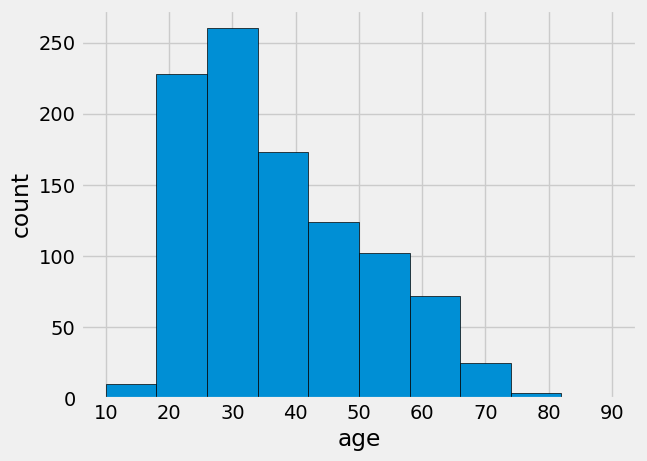

In [73]:
#we first need to import the library
import matplotlib.pyplot as plt

#then we need to specify the number of bins and range of values of the histogram
num_bins = 10
hist_range = (10, 90) 

plt.hist(stops['subject_age'], bins=num_bins, range=hist_range, edgecolor='k')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

From the graph above we can get the information that the age interval (30, 40) has the most number of subjects. 

#### **2. Bar Charts:**

#### **3. Scatter Plots:** Generate sccatter plots to visualize relationships between specific variables. 

Discuss any insights gained from scatter plots.

Text(0, 0.5, 'Y-axis')

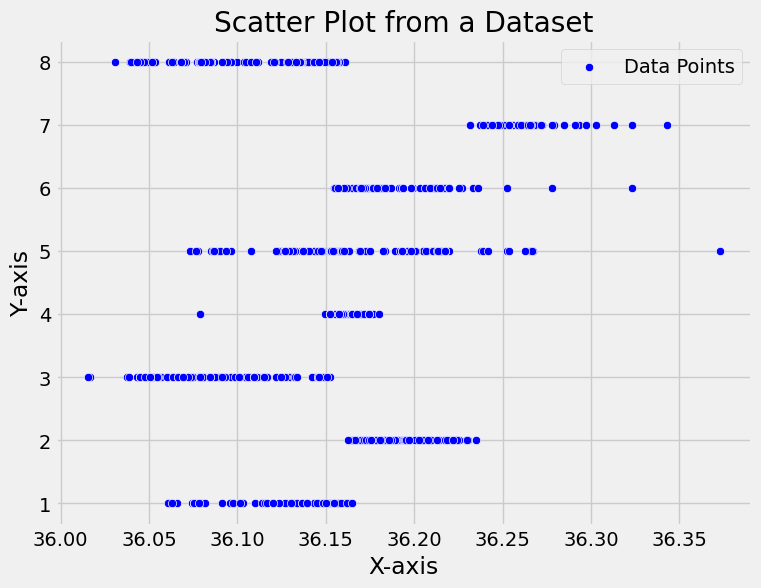

In [78]:
# SCATTER CODE
import seaborn as sns
import matplotlib.pyplot as plt
stops_scatter = stops[stops['lat'] > 36]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=stops_scatter, x='lat', y='precinct', color='blue', marker='o', label='Data Points')
plt.title('correation between Latitude and Precinct')
plt.xlabel('Latitude')
plt.ylabel('Y-axis')

#### **4. Box Plots:** Create a box plots for relevant columns. 

Box plots display data distribution by showing the median, quartiles, and potential outliers, providing a visual summary of a dataset's central tendency, spread, and skewness.

/var/folders/06/88j167yd235cc1nhrp1vzq5r0000gn/T/ipykernel_69537/759966538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stops, x='subject_race', y='subject_age', palette='Set2')


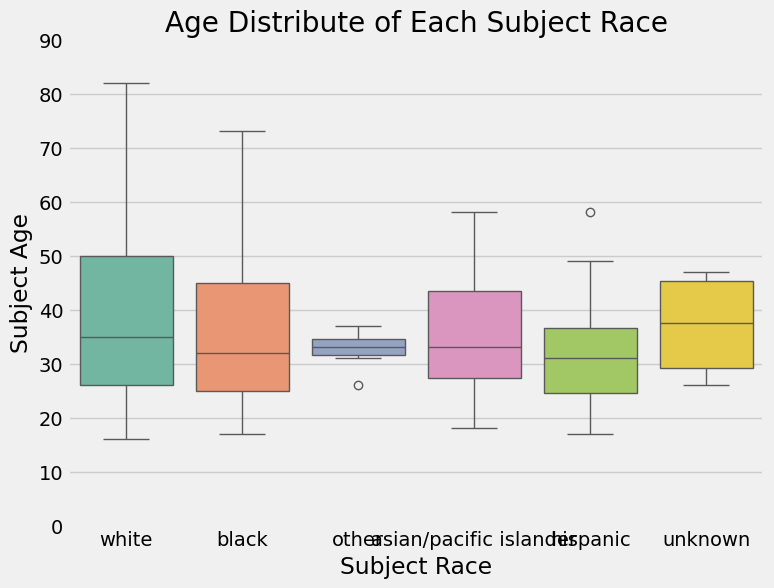

In [86]:
# For this plot type we will look at the age distribution of all the subject races 
#(very similar to what we did in the aggregation section but this time we are making visualizations)

#first we need to group the function
grouped = stops[['subject_age', 'subject_race']].groupby('subject_race')

#then we can make a boxplot using the grouped dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=stops, x='subject_race', y='subject_age', palette='Set2')
plt.title('Age Distribute of Each Subject Race')
plt.xlabel('Subject Race')
plt.ylabel('Subject Age')
plt.ylim(0, 90)
plt.show()


**Box (Rectangle)**: The box represents the interquartile range (IQR), which encompasses the middle 50% of the data. The bottom and top edges of the box mark the first quartile (25th percentile, Q1) and the third quartile (75th percentile, Q3), respectively. The line inside the box represents the median (50th percentile).

**Whiskers**: The whiskers extend from the box and represent the range within which most of the data falls. Data points within 1.5 times the IQR from the lower or upper quartiles are considered within the whiskers' range.

**Individual Points**: Any data points that fall outside the whiskers' range are plotted individually as points. These are potential outliers and are drawn as "white dots." In this graph, we can see that there are potential outliers in the `others` and `hispanics` categories. 





#### 5. **Time Series Analysis:**
Introduce time series data analysis using a specific example from the dataset.

Analyze and visualize police stop trends over time (e.g., monthly or yearly).

Use time-specific data to demonstrate aggregation techniques.

Create line plots to visualize time series data.

**Question 1.5.1**: 
Can you provide a specific example from the Nashville dataset that highlights the importance of time series analysis, using columns like 'date' and 'time'? 

Hint: 
1. You can explore how police stops have evolved over time by focusing on the 'date' and 'time' columns. Look for temporal trends that may require time series analysis. 
2. Use column "citation_issued"

In [60]:
# Extract time-related columns, e.g., 'date' and 'time', and other relevant data
time_series_data = stops[['date', 'time', 'citation_issued']]

# Further data processing and analysis
# ...

WRITE SOMETHING ABOUT CHANGING TO DATE TIME AND PUTTING THAT TO INDEX. 

In [61]:
time_series_data.index = pd.to_datetime(time_series_data["date"])
time_series_data = time_series_data.drop("date", axis=1)
time_series_data

,time,citation_issued
date,,
2010-04-18,13140.0,False
2015-01-19,19920.0,False
2015-01-15,1020.0,False
2013-05-17,62760.0,False
2010-09-01,28140.0,False
...,...,...
2012-07-01,6360.0,False
2012-01-10,65220.0,True
2016-08-12,78420.0,False


**Question 1.5.2**: How can we effectively group the data to analyze police stop trends on a monthly or yearly basis using the 'date' column, and what insights can such analysis provide?

Hint: 
1. Consider using the 'date' column to group data into monthly or yearly intervals. 
2. Create line plots to visualize how police stop trends change over time.
3. Using column "citation_issues"


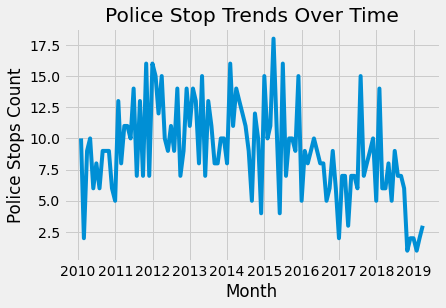

In [257]:
# Sample code to group data and create time series visualizations
import matplotlib.pyplot as plt

# Group data by month and analyze trends
monthly_data = time_series_data.resample('M').count()  # Resample data to monthly frequency

# Create a line plot to visualize monthly trends
plt.plot(monthly_data.index, monthly_data['citation_issued'])
plt.xlabel('Month')
plt.ylabel('Police Stops Count')
plt.title('Police Stop Trends Over Time')
plt.show()

**Question 1.5.3**: What are some key aggregation techniques that can be applied to the time-specific data in this dataset, particularly using the 'date' column, and why are they important for understanding the dataset?

Hint: 
1. Consider aggregation methods such as count or mean to analyze the dataset over time, focusing on the 'date' column.
2. Use "citation_issued" for 'your_column_of_interest'
3. Use Sum as 'your_aggregation_function' with the specific variables you are interested in analyzing within your dataset.

In [63]:
# Sample code for demonstrating aggregation techniques
aggregated_data = time_series_data.groupby('date').agg({'your_column_of_interest': 'your_aggregation_function'})

KeyError: "Column(s) ['your_column_of_interest'] do not exist"

**Question 1.5.4**: Could you explain the process of creating line plots to visualize time series data based on the 'date' column, and provide an example of what a line plot might reveal about the data over time?

Hint: 
1. Use the aggregated data from Section 3 and create line plots to visually represent trends over time.
2. Use "citation_issued" as 'your_column_of_interest'.

In [ ]:
# Sample code for creating line plots to visualize time series data
plt.plot(aggregated_data.index, aggregated_data['your_column_of_interest'])
plt.xlabel('Date')
plt.ylabel('Your Y-axis Label')
plt.title('Time Series Data Visualization')
plt.show()

NameError: name 'aggregated_data' is not defined

## Conclusion 

Summarize key findings from the data analysis. Discuss insights or patterns observed during the analysis.

Reflect on the importance of data cleaning, summary statistics, visualization, and data aggregation in exploratory data analysis.



In [ ]:
# HERE

## References

Include references or data sources used in the lab, such as the Stanford traffic stop data library and relevant documents related to Nashville policing practices for traffic stops.